In [2]:
#getting all the required libraries with the similarities 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import display 

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from scipy.spatial.distance import jaccard

In [3]:
#creating a class
class Music:
    
    #creating dictionary to add the features 
    features = []
    #creating a dataframe with pandas to call the file 
    dataset = pd.DataFrame()
    
    ref_music = pd.DataFrame()
    #used to enter a target key 
    key = ''
    
    def __init__(self, file, features, key):
        #initialising self,file and features
        self.features = features
        self.dataset = pd.read_csv(file)[features]
        #removing NaN values
        self.dataset.dropna(axis = 0, inplace = True)
        for col in self.dataset.columns:
          # Step to make sure there's no confusion b/w float and str for sklearn while comparing distance.
            self.dataset[col] = self.dataset[col].astype(str)
        self.key = key
        self.ref_music = self.dataset[self.dataset['id'] == key]
    #displays the value 
    def show_data(self):
        display(self.dataset.head())
    #generating the similarities 
    def generate_cosine_sim(self):

        self.dataset['cos_sim'] = cosine_similarity(self.dataset[self.features[2:]], self.ref_music[self.features[2:]]).reshape(-1)
            
    def generate_euclidean_sim(self):
        
        self.dataset["euclidean_distance"] = euclidean_distances(self.dataset[self.features[2:]], self.ref_music[self.features[2:]]).reshape(-1)
    
    def generate_manhattan_sim(self):
       
        self.dataset['manhatten_distance'] = manhattan_distances(self.dataset[self.features[2:]], self.ref_music[self.features[2:]]).reshape(-1)
    
    #def generate_jaccard_sim(self):
        
    
        #self.dataset['jaccard_similarity'] = distance.jaccard(self.dataset[self.features[2:]], self.ref_music[self.features[2:]])
    #defining rank to get the music ranked according to most played
    def rank(self):
        
        self.dataset.sort_values(by = 'euclidean_distance', inplace = True)
        display(self.dataset[self.dataset['id'] != self.key].head())

In [4]:
file = "Music.csv"

features =  [
    'id',
    'name',
    'acousticness',  
    'danceability', 
    'energy', 
    'liveness', 
    'loudness', 
    'popularity', 
    'speechiness', 
    'tempo', 
    'valence'
]
#target ID
key = '6KbQ3uYMLKb5jDxLF7wYDD'
#calling the objects
Music_obj = Music(file ,features, key)
Music_obj.generate_cosine_sim()
Music_obj.generate_euclidean_sim()
Music_obj.generate_manhattan_sim()

#Music_obj.generate_jaccard_sim()

Music_obj.show_data()
Music_obj.rank()


,id,name,acousticness,danceability,energy,liveness,loudness,popularity,speechiness,tempo,valence,cos_sim,euclidean_distance,manhatten_distance
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,0.995,0.708,0.195,0.151,-12.427999999999999,0,0.0506,118.469,0.779,1.000000,0.000000,0.0000
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento",0.9940000000000001,0.379,0.0135,0.0763,-28.454,0,0.0462,83.97200000000001,0.0767,0.975399,38.046231,51.8159
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,0.604,0.7490000000000001,0.22,0.11900000000000001,-19.924,0,0.929,107.177,0.88,0.996821,13.588130,20.2564
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),0.995,0.7809999999999999,0.13,0.111,-14.734000000000002,0,0.0926,108.00299999999999,0.72,0.999516,10.717798,13.0510
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61",0.99,0.21,0.204,0.098,-16.829,1,0.0424,62.148999999999994,0.0693,0.987079,56.507220,63.0039


,id,name,acousticness,danceability,energy,liveness,loudness,popularity,speechiness,tempo,valence,cos_sim,euclidean_distance,manhatten_distance
16457,2zGRSEIgvb4n2esWsfiimc,Apo ena ampeli perasa,0.995,0.57,0.314,0.151,-12.604000000000001,0,0.0698,118.115,0.7190000000000001,0.999997,0.439847,0.8662
16377,65sV4CF3REc4lXiCnAGoVR,Μάνα διώξε τους γιατρούς,0.966,0.73,0.29600000000000004,0.10800000000000001,-12.097000000000001,0,0.0531,118.309,0.516,0.999994,0.466595,0.9515
24,6W7iUeL4W0WVIF1BEOCswF,El Espejito - Remasterizado,0.988,0.6990000000000001,0.221,0.142,-12.228,0,0.115,117.899,0.782,0.999999,0.608230,0.8884
1088,0tLIeDjyvvofTlYwFCFPJP,Bhulnewale Tujhe Apni Jafaon Ki,0.9690000000000001,0.7190000000000001,0.0635,0.0937,-11.97,0,0.39,118.64,0.7809999999999999,0.999987,0.612841,1.1962
49000,0nJ62iZkL3DsElCaiq23q4,Jefferson and Liberty,0.977,0.6890000000000001,0.263,0.111,-13.164000000000001,0,0.0664,118.53299999999999,0.6509999999999999,0.999981,0.754543,1.0888


In [5]:
#creating a class
class Artist:
    #opening empty dictionaries and initialising them 
    features = []
    dataset = pd.DataFrame()
    dataset_mean_by_artist = pd.DataFrame()
    key = ''
    
    ref_artist = ''
    
    def __init__(self, file, features):
        
        self.features = features
        self.dataset = pd.read_csv(file)[features]
    
    def show_data(self):
    
        display(self.dataset.head())
    #generating a mean 
    def generate_mean(self):
    
         self.dataset_mean_by_artist = self.dataset[features[1:]].groupby('artists', as_index = False).mean()
    #setting up of the reference artist with the key 
    def set_ref_artist(self, key):
        
        self.key = key
        self.ref_artist = self.dataset_mean_by_artist[self.dataset_mean_by_artist["artists"] == key]
    #generating the similarities
    def generate_cosine_sim(self):

        self.dataset_mean_by_artist['cos_sim'] = cosine_similarity(self.dataset_mean_by_artist[self.features[2:]], self.ref_artist[self.features[2:]]).reshape(-1)
        
    def generate_euclidean_sim(self):
        
        self.dataset_mean_by_artist["euclidean_distance"] = euclidean_distances(self.dataset_mean_by_artist[self.features[2:]], self.ref_artist[self.features[2:]]).reshape(-1)
    
    def generate_manhattan_sim(self):
       
        self.dataset_mean_by_artist['manhatten_distance'] = manhattan_distances(self.dataset_mean_by_artist[self.features[2:]], self.ref_artist[self.features[2:]]).reshape(-1)

    def generate_jaccard_sim(self):
        
        self.dataset_mean_by_artist['jaccard distance'] = self.dataset.apply(lambda x: jaccard_score(x[self.features[2:]].to_numpy(), self.ref_artist[self.features[2:]].to_numpy(), average='macro'), axis = 1)
    #defining rank to rank the artists in order
    def rank(self):
        
        self.dataset_mean_by_artist.sort_values(by = 'manhatten_distance', inplace = True)
        display(self.dataset_mean_by_artist.head())
    #Finding the Target artist with the Reference music
    def get_music(self):
        
        display(self.dataset[self.dataset['artists'] == key][["artists", "name"]].head())
    #recommending the songs based on the similarity     
    def recommend(self, algo = 'manhatten_distance'):
        self.dataset_mean_by_artist.sort_values(by = algo,  inplace=True)
        display(self.dataset_mean_by_artist[:10])
    #plotting the graph
    def plot_recommend(self):
          print(self.dataset_mean_by_artist['manhatten_distance'])
          #creating the object to call them 
          objects = ( 'cosine_sim','euclidean_sim', 'manhatten_sim')
          #creates an array based on numerical ranges
          y_position = np.arange(len(objects))
          performance = [self.dataset_mean_by_artist['cos_sim'].mean() ,self.dataset_mean_by_artist['euclidean_distance'].mean(),self.dataset_mean_by_artist['manhatten_distance'].mean()]
          #giving values of how the graph must me and what should contain in it
          plt.bar(y_position, performance, align = 'center', alpha = 0.5)
          plt.xticks(y_position, objects)
          plt.ylabel('Score')
          plt.title('Reccommendation')
          print("Highest Reccommendation accuracy is manhatten_distance with Value = ", self.dataset_mean_by_artist['manhatten_distance'].mean())


In [6]:
file = "Music.csv"

features =  [
    'name',
    'artists',
    'acousticness',  
    'danceability', 
    'energy', 
    'liveness', 
    'loudness', 
    'popularity', 
    'speechiness', 
    'tempo', 
    'valence'
]
#Target Artist is taken
key = "['Carl Woitschach']"
#calling the function using objects
artist_obj = Artist(file, features)
artist_obj.generate_mean()
artist_obj.set_ref_artist(key)
artist_obj.generate_cosine_sim()
artist_obj.generate_euclidean_sim()
artist_obj.generate_manhattan_sim()
#artist_obj.generate_jaccard_sim()
#artist_obj.generate_pearson_sim()
artist_obj.show_data()
artist_obj.rank()
artist_obj.get_music()
artist_obj.recommend()

,name,artists,acousticness,danceability,energy,liveness,loudness,popularity,speechiness,tempo,valence
0,Singende Bataillone 1. Teil,['Carl Woitschach'],0.995,0.708,0.1950,0.1510,-12.428,0,0.0506,118.469,0.7790
1,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",0.994,0.379,0.0135,0.0763,-28.454,0,0.0462,83.972,0.0767
2,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],0.604,0.749,0.2200,0.1190,-19.924,0,0.9290,107.177,0.8800
3,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],0.995,0.781,0.1300,0.1110,-14.734,0,0.0926,108.003,0.7200
4,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",0.990,0.210,0.2040,0.0980,-16.829,1,0.0424,62.149,0.0693


,artists,acousticness,danceability,energy,liveness,loudness,popularity,speechiness,tempo,valence,cos_sim,euclidean_distance,manhatten_distance
2453,['Carl Woitschach'],0.9908,0.6402,0.295,0.1564,-11.617,0.0,0.04676,119.8774,0.8012,1.000000,0.000000,0.00000
7979,"['Kakkia Mendri', 'Lidia Likiardopoulou', 'Nik...",0.9930,0.6250,0.417,0.1270,-11.145,0.0,0.04000,119.7360,0.7480,0.999992,0.511506,0.84216
5625,"['Giota Lidia', 'Prodromos Tsaousakis']",0.9930,0.6130,0.311,0.1340,-11.212,0.0,0.04510,119.6330,0.9610,0.999994,0.500797,0.87866
11153,['Osvaldo Fresedo y su Orquesta Típica'],0.8190,0.7250,0.289,0.0664,-11.858,0.0,0.07820,120.1210,0.5480,0.999995,0.476826,1.12184
7797,['Juancito Diaz'],0.9690,0.5840,0.253,0.1450,-11.754,0.0,0.03230,120.4100,0.3570,0.999993,0.710973,1.25966


,artists,name
0,['Carl Woitschach'],Singende Bataillone 1. Teil
7,['Carl Woitschach'],Per aspera ad astra
8200,['Carl Woitschach'],Singende Bataillone 2. Teil
8203,['Carl Woitschach'],"Lore, Lore, Lore"
8227,['Carl Woitschach'],Reserve hat Ruh 2. Teil


,artists,acousticness,danceability,energy,liveness,loudness,popularity,speechiness,tempo,valence,cos_sim,euclidean_distance,manhatten_distance
2453,['Carl Woitschach'],0.990800,0.6402,0.295000,0.156400,-11.617000,0.0,0.046760,119.877400,0.801200,1.000000,0.000000,0.000000
7979,"['Kakkia Mendri', 'Lidia Likiardopoulou', 'Nik...",0.993000,0.6250,0.417000,0.127000,-11.145000,0.0,0.040000,119.736000,0.748000,0.999992,0.511506,0.842160
5625,"['Giota Lidia', 'Prodromos Tsaousakis']",0.993000,0.6130,0.311000,0.134000,-11.212000,0.0,0.045100,119.633000,0.961000,0.999994,0.500797,0.878660
11153,['Osvaldo Fresedo y su Orquesta Típica'],0.819000,0.7250,0.289000,0.066400,-11.858000,0.0,0.078200,120.121000,0.548000,0.999995,0.476826,1.121840
7797,['Juancito Diaz'],0.969000,0.5840,0.253000,0.145000,-11.754000,0.0,0.032300,120.410000,0.357000,0.999993,0.710973,1.259660
10423,['Mohantara Talpade'],0.992000,0.6445,0.174175,0.194750,-12.186750,0.0,0.371125,120.121500,0.696250,0.999985,0.718691,1.407840
11802,['Purushottam Upadhyay'],0.971000,0.2810,0.377000,0.180000,-12.106000,0.0,0.035200,119.704000,0.504000,0.999984,0.703099,1.455760
6163,['Harry Gold & His Pieces Of Eight'],0.891111,0.6610,0.293778,0.166044,-12.323222,0.0,0.073622,119.283444,0.835111,0.999979,0.929446,1.492307
16554,"['Απόστολος Χατζηχρήστος', 'Giannis Papaioannou']",0.982000,0.5920,0.592000,0.186000,-11.271000,0.0,0.032800,119.287000,0.960000,0.999993,0.764975,1.492760
9148,['Los Troveros Criollo'],0.916800,0.7504,0.608400,0.229760,-11.878000,0.2,0.062460,120.293400,0.897200,0.999993,0.641764,1.559660


2453       0.000000
7979       0.842160
5625       0.878660
11153      1.121840
7797       1.259660
            ...    
1356     193.814940
10731    196.331926
13530    196.664917
4558     198.357940
13524    224.094460
Name: manhatten_distance, Length: 16708, dtype: float64
Highest Reccommendation accuracy is manhatten_distance with Value =  59.629063473858345


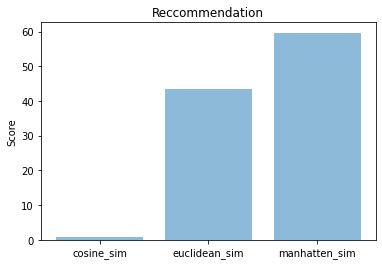

In [7]:
#calling the object to display the graph
artist_obj.plot_recommend()